In [1]:
%run -i 'init.py'

## Deterministic Test Case
Non-traditional ETFs do manage to meet their daily target (2:1 or 3:1), but since they "rebalance" daily, the long-term results may be skewed. Say you have bought a 3:1-leveraged ETF that targets thrice the return of index XY. You pay \$100 to buy a share of ETF when the benchmark index is at 10,000. If index XY zooms up 10% the next day to 11,000, the leveraged ETF would increase 30% to \$130. Now, if the index falls from 11,000 back down to 10,000 the following day, there is a 9.09% decline. The leveraged ETF you are holding would __go down thrice, i.e. by 27.27%__. Now, although the index returned to the starting point, a 27.27% decline __from \$130__ would leave you with an ETF share worth just \$94.55, i.e. the ETF share is down by 5.45%.

Read more: A Guide For Buying ETFs On Margin | Investopedia https://www.investopedia.com/articles/investing/060314/guide-buying-etfs-margin.asp#ixzz5NhiSeriw 
Follow us: Investopedia on Facebook

In [2]:
Simulate_Path([0.1, -0.0909])

,Del (%),Nrm,Nrm (USD),Nrm (pct),3x,3x (USD),3x (pct),Lvg,Lvg (USD),Lvg (pct)
0,NaN,100.000,NaN,NaN,300.000,NaN,NaN,100.000,NaN,NaN
1,10.00,110.000,10.000,10.000,330.000,30.000,10.000,130.000,30.000,30.000
2,-9.09,100.001,0.001,0.001,300.003,0.003,0.001,94.549,-5.451,-5.451


## Historic Data

In [3]:
cwd = os.getcwd()
df_historic = pd.read_csv(os.path.join(cwd, "S&P500.csv"), sep = ',')
df_historic.head()

df_historic = df_historic[::-1]

head_dy = '2010-01-01'
tail_dy = '2018-08-01'
df_historic = df_historic[(df_historic["Date"] > head_dy) & (df_historic["Date"] < tail_dy)]
df_historic = df_historic.set_index("Date")

In [4]:
df_path = Simulate_Path(df_historic["Change %"])
df_path = df_path[1:]
df_path["Date"] = df_historic.index.values
df_path = df_path.set_index("Date")
title = "Investing $%i in %s ~ %s"%(fund, df_path.index.values[0], df_path.index.values[-1])
df_path[::-1].head()

,Del (%),Nrm,Nrm (USD),Nrm (pct),3x,3x (USD),3x (pct),Lvg,Lvg (USD),Lvg (pct)
Date,,,,,,,,,,
2018-07-31,0.49,252.441917,152.441917,152.441917,757.325751,457.325751,152.441917,910.618787,810.618787,810.618787
2018-07-30,-0.58,251.210983,151.210983,151.210983,753.632950,453.632950,151.210983,897.426615,797.426615,797.426615
2018-07-27,-0.66,252.676507,152.676507,152.676507,758.029521,458.029521,152.676507,913.318355,813.318355,813.318355
2018-07-26,-0.30,254.355252,154.355252,154.355252,763.065755,463.065755,154.355252,931.767348,831.767348,831.767348
2018-07-25,0.91,255.120614,155.120614,155.120614,765.361841,465.361841,155.120614,940.229413,840.229413,840.229413


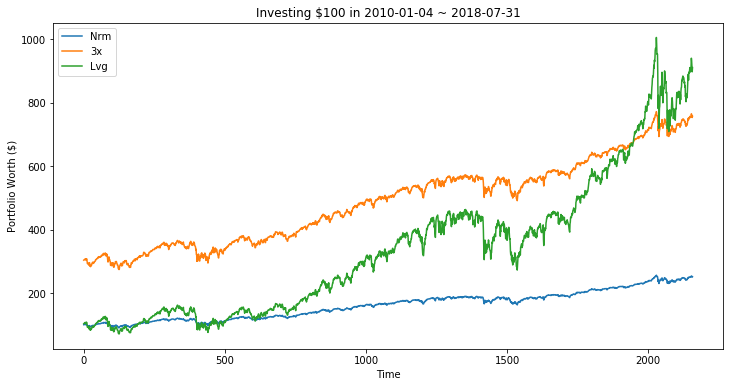

In [5]:
Plot_3(df_path, [key_norm, key_3xn, key_lvg],
      "Time", "Portfolio Worth ($)", title, save = True)

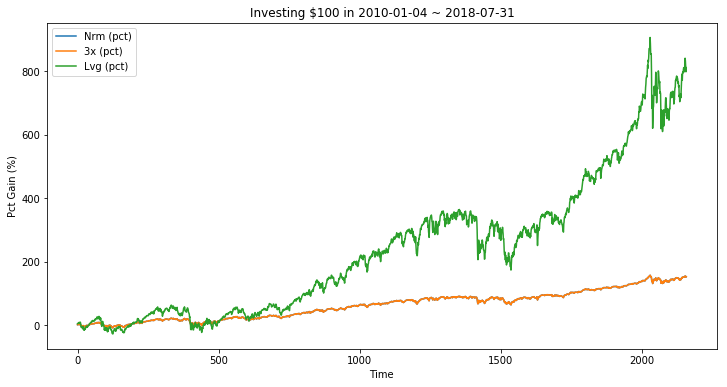

In [6]:
Plot_3(df_path, [key_pctn, key_pct3, key_lvgp],
      "Time", "Pct Gain (%)", title, save = True)

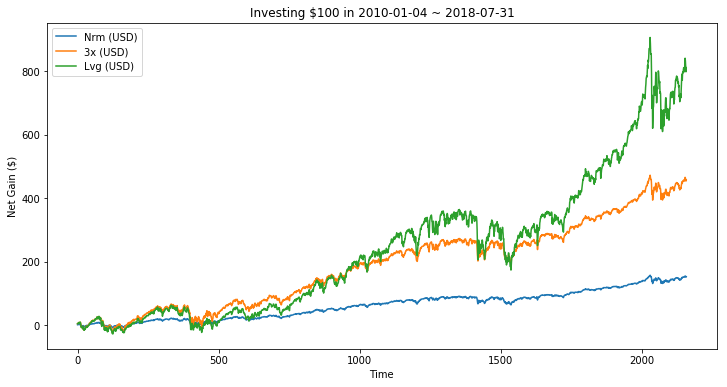

In [7]:
Plot_3(df_path, [key_netn, key_net3, key_netl],
      "Time", "Net Gain ($)", title, save = True)